<b>Checkpoint 1<b>

1. Reading Company data from companies.txt. Using separator as tab and python parsing engine. Encoding ANSI. I chose ANSI encoding because I checked that the original file is ANSI encoded. I used Notepad's saveAs to check the encoding.

In [753]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
companies  = pd.read_csv("companies.txt", sep='\t', engine='python', encoding = "ANSI")
companies

In [ ]:
companies.describe()

It can be seen from above data description that count is less than unique values in all columns of companies.txt except permalink. So let's analyze permalink a little more. Maybe there are duplicates with different cases. So converting everything to upper case and then checking if we have any duplicates:-

In [ ]:
companies.permalink.str.upper().duplicated().sum()

So there are no duplicates so we can be sure permalink is an unique column in companies. Let's analyze this data a bit more. Analyzing duplicate homepage urls:-

In [ ]:
#fetch homepage urls which have a duplicate in the dataframe.
companies.homepage_url.iloc[np.array(companies.homepage_url.duplicated())].dropna()

In [ ]:
#getting all rows which have these duplicated homepage urls just to see whether these companies are same or different
companies[companies.homepage_url.isin(companies.homepage_url.iloc[np.array(companies.homepage_url.duplicated())].dropna())]

In [ ]:
companies[companies['homepage_url']=='http://www.lionandfoster.com/']

As we can see from the above data, different companies have same homepage url. So homepage url can't be used to identify a company anywhere. Example, http://www.lionandfoster.com/ 	is the homepage for 2 clearly differnt companies.

2. Reading Rounds2 data from rounds2.csv. Using python parsing engine and encoding ANSI. I chose ANSI encoding because I checked that the original file is ANSI encoded. I used Notepad's saveAs to check the encoding.

In [ ]:
rounds2   = pd.read_csv("rounds2.csv", engine='python', encoding = "ANSI")
rounds2.head()

In [ ]:
rounds2.describe(include = "all")

It can be seen from above data description that count is less than unique values in all columns of rounds2.csv except funding_round_permalink. So let's analyze funding_round_permalink a little more. Maybe there are duplicates with different cases. So converting everything to upper case and then checking if we have any duplicates:-

In [ ]:
rounds2.funding_round_permalink.str.upper().duplicated().sum()

So there are no duplicates so we can be sure funding_round_permalink is an unique column in companies and the primary key of this table. Let's analyze this data a bit more. Analyzing number of unique company_permalink (Company_permalink is also the foreign key which references to companies dataframe):-

In [ ]:
#checking the number of unique company_permalink in rounds2
rounds2.company_permalink.count() - rounds2.company_permalink.str.upper().duplicated().sum()

In [ ]:
len(rounds2.company_permalink.str.lower().unique())

So, the number of unique companies in both companies and rounds2 dataframes is 66368 now let's analyze the next question which is:-
Are there any companies in the rounds2 file which are not  present in companies ?

In [ ]:
#creating new columns permalink_upper and company_permalink_upper in companies and rounds2 respectively.
#I dont want to overwrite the original data columns that's why created new ones.
companies['permalink_upper'] = companies.permalink.str.upper()
rounds2['company_permalink_upper'] = rounds2.company_permalink.str.upper()

In [ ]:
#checking if rounds2 has any company which is not present in companies dataframe.
len(np.setdiff1d(np.array(rounds2.company_permalink_upper),np.array(companies.permalink_upper)))

As we can see, there is no company in rounds2 dataframe which is not present in companies. Now lets check if the opposite is also true. 

In [ ]:
#checking if companies has any company which is not present in rounds2 dataframe.
len(np.setdiff1d(np.array(companies.permalink_upper), np.array(rounds2.company_permalink_upper)))

So, now it is clear that there is no company in companies dataframe which is not present in rounds2. So, we need not worry about it when we join these 2 dataframes. Let's now merge these dataframes on new columns:-

In [804]:
#using left join but in this case inner join would return the same result because rounds2 doesn't have any company
#which is not present in companies.
master_frame = rounds2.merge(companies, left_on='company_permalink_upper', right_on='permalink_upper', how='left')

In [ ]:
master_frame.head()

In [282]:
#analyzing master_frame
master_frame.describe(include = 'all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upper,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_upper
count,114949,114949,114949,31140,114949,9.495900e+04,114949,114949,114948,108815,111539,114949,106271,104003,104782,104785,94428,114949
unique,90247,114949,14,8,5033,NaN,66368,66368,66102,61191,27296,4,137,311,1092,5111,3978,66368
top,/ORGANIZATION/SOLARFLARE,/funding-round/124d05ab408bce861da538bd6ff1bfff,venture,A,01-01-2014,NaN,/ORGANIZATION/SOLARFLARE,/Organization/Solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/ORGANIZATION/SOLARFLARE
freq,10,1,55494,14747,779,NaN,19,19,19,19,8165,90153,72308,26664,19078,7422,4642,19
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [805]:
#Lets drop few unnecessary columns
master_frame = master_frame.drop(['company_permalink','permalink', 'permalink_upper'], axis=1)
master_frame.describe(include='all')

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upper,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114949,114949,31140,114949,9.495900e+04,114949,114948,108815,111539,114949,106271,104003,104782,104785,94428
unique,114949,14,8,5033,NaN,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/funding-round/124d05ab408bce861da538bd6ff1bfff,venture,A,01-01-2014,NaN,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,55494,14747,779,NaN,19,19,19,8165,90153,72308,26664,19078,7422,4642
mean,NaN,NaN,NaN,NaN,1.042687e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.148212e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.680511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>2. CHECKPOINT 2</b> :- 
    <br>Average Values of Investments for Each of these Funding Types

Our data has a lot of missing values which can affect the average value calculation. Let's analyze how much missing values are there in our table and delete/impute/interpolate them accordingly.

In [806]:
100*(master_frame.isna().sum()/len(master_frame.index))

funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
company_permalink_upper     0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

For country_code, we can think of filling up the values if we have information on the city or the region. For example, if the region is Delhi but have country_code NaN, then we can correctly write the country_code as IND. So, let's check if we have any rows where country_code is NaN but city, region, state_code not NaN:-

In [309]:
master_frame[master_frame['country_code'].isna() &
             (~master_frame['state_code'].isna() | ~master_frame['region'].isna() | ~master_frame['city'].isna())].count()

funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
company_permalink_upper    0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
dtype: int64

    We can see from above data 'funding_round_code' is kind of useless with 72% NaN values and we don't need it in our current requirement. Same applies for homepage_url, founded_at. city, region, state_code are useless too because we can't use it interpolate country_code. We can't delete category_list and country_code because we need those columns in future requirements. Let's drop all these unwanted columns to clean data.

In [807]:
master_frame = master_frame.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)

In [311]:
100*(master_frame.isna().sum()/len(master_frame.index))

funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
company_permalink_upper     0.000000
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
dtype: float64

For raised_amount_usd, we have 2 options. One is we try to fill it with average values and 2nd is to just delete the rows which have NaN values. We can use mean value to Let's look at the column description to decide if we can impute values in the column:-

In [290]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The difference in min and max is huge. So using mean value to imputing the values might ruin the data by introducing bias. So we just delete the rows with NaN values.

In [808]:
master_frame = master_frame[~master_frame['raised_amount_usd'].isna()]

In [313]:
100*(master_frame.isna().sum()/len(master_frame.index))

funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
company_permalink_upper    0.000000
name                       0.001053
category_list              1.099422
status                     0.000000
country_code               6.161607
dtype: float64

country_code and category_list are important columns which we can't drop and also can't ignore. The percentage of NaN values in it is very less so we will delete them too:-

In [809]:
master_frame = master_frame[~master_frame['country_code'].isna()]
master_frame = master_frame[~master_frame['category_list'].isna()]
100*(master_frame.isna().sum()/len(master_frame.index))

funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
company_permalink_upper    0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
dtype: float64

In [345]:
master_frame[master_frame['name'].isna()]

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,category_list,status,country_code
98692,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,01-03-2012,25000.0,/ORGANIZATION/TELL-IT-IN,NaN,Startups,closed,USA


name coumn has only 1 NaN value but name is not an important field to get any business insight so I will ignore it. I am also not dropping this column just because of 1 missing value. Now we have completely cleaned our data. Now we will proceed to find the average funding amount per funding type. The average value is not always mean. It can be median also. We already saw that the difference between min and max values was huge. Let's visualize it using boxplots to come to final conclusion.

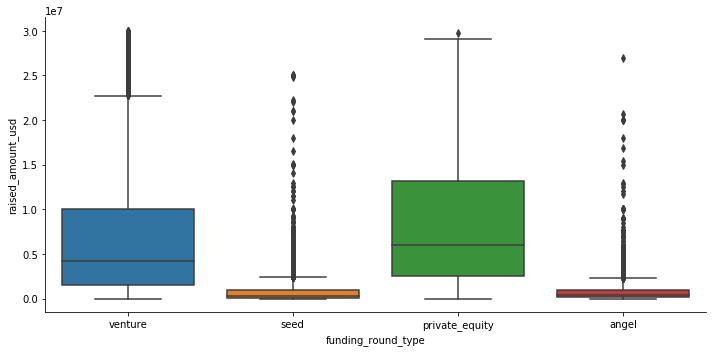

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt
master_frame1 = master_frame[master_frame['raised_amount_usd'] < 30000000.0]
sns.catplot(x="funding_round_type", y="raised_amount_usd", kind="box", height=5, aspect=2, data=master_frame1[master_frame1['funding_round_type'].isin(['venture', 'angel', 'seed','private_equity'])])

as we can see from above boxplots are clearly positively skewed. mean value is larger than median because of the outlier large values which can't be considered to calculate the central tendency. From this observation, i am convinced that we should be using median.

In [349]:
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,414906.0
convertible_note,300000.0
debt_financing,1096653.0
equity_crowdfunding,85000.0
grant,225000.0
non_equity_assistance,60000.0
post_ipo_debt,19900000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


<b>3. Checkpoint 3 :- </b> <br> Analysing the Top 3 English-Speaking Countries

The chosen investment type is venture because Spark Funds wants to invest between 5-15 million USD and we want to narrow down the countries where the company can invest in. So lets first filter based on venture

In [810]:
master_frame_All = master_frame
master_frame = master_frame[master_frame['funding_round_type']=='venture']

Next is to find the top 9 countries where most amout of investments have happened in venture Funding type.

In [864]:
top9 = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(
ascending=False)
top9 = top9.index.tolist()[:9]
top9

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

So we have now got the list of top 9 countries now we have to find out the top 3 counties where English is an official language. For that, we have been a a wikipedia page https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language. Instead of manually reading the data from this page, we will use BeautifulSoup to scrape the data and form a list of countries where English is an official language. 

In [871]:
def getListofOfficialEnglishLanguageCountries():
    from bs4 import BeautifulSoup
    import requests
    URL = 'https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language'
    response =  requests.get(URL)
    soup = BeautifulSoup(response.text, 'html.parser')
    #table1 =  soup.find('table', {'class':'wikitable sortable'}).tbody
    englishSpeakingCountries = []
    for row in soup.findAll('tr'):
       dataRow = []
       for cell in row.find_all("td")[2:3]:
            dataRow.append(cell.get_text().strip())
       englishSpeakingCountries.append(", ".join(dataRow))
    englishSpeakingCountries = englishSpeakingCountries[1:62]
    return englishSpeakingCountries

In [873]:
englishSpeakingCountries = getListofOfficialEnglishLanguageCountries()
englishSpeakingCountries

['AUS',
 'NZL',
 'GBR',
 'USA',
 '',
 'ATG',
 'BHS',
 'BRB',
 'BLZ',
 'BWA',
 'BDI',
 'CMR',
 'CAN',
 'COK',
 'DMA',
 'SWZ',
 'FJI',
 'GMB',
 'GHA',
 'GRD',
 'GUY',
 'IND',
 'IRL',
 'JAM',
 'KEN',
 'KIR',
 'LSO',
 'LBR',
 'MWI',
 'MLT',
 'MHL',
 'MUS',
 'FSM',
 'NAM',
 'NRU',
 'NGA',
 'NIU',
 'PAK',
 'PLW',
 'PNG',
 'PHL',
 'RWA',
 'KNA',
 'LCA',
 'VCT',
 'WSM',
 'SYC',
 'SLE',
 'SGP',
 'SLB',
 'ZAF',
 'SSD',
 'SDN',
 'TZA',
 'TON',
 'TTO',
 'TUV',
 'UGA',
 'VUT',
 'ZMB',
 'ZWE']

Now that we have the list of countries where English is an official language, let's compare our top 9 countries with this list to find out the top 3 countries where Spark Funds would want to invest:-

In [923]:
top3countries=[]
for ctry in top9:
    if ctry in englishSpeakingCountries:
        top3countries.append(ctry)
top3countries[:3]    

['USA', 'GBR', 'IND']

<b>Checkpint 4 : sector analysis<b>

Now that we have found our top 3 countries where Spark Funds would want to invest, let's now filter data based on these 3 countries:-

In [925]:
master_frame = master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'IND'])]

As given in the instructions, the business rule is that the first string before the pipe '|' will be the primary sector. I am creating a new column to save the primary sector and will keep category_list column as it is.

In [926]:
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x : x.split('|')[0])
master_frame['primary_sector']

0                 Media
10            Analytics
11            Analytics
12            Analytics
22                 Apps
              ...      
114920    Biotechnology
114922    Biotechnology
114923    Biotechnology
114934       E-Commerce
114936    Biotechnology
Name: primary_sector, Length: 38803, dtype: object

Reading mapping.csv to get mapping data for 8 main sectors. The encoding used in it is UTF-8 so we dont have to specify any special encoding.

In [927]:
mapping = pd.read_csv('mapping.csv')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


Let's now clean mapping dataframe. As seen from the above data, the first category list is NaN. So, i will remove that category.

In [928]:
mapping = mapping[~mapping['category_list'].isna()]
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,687.000000,687.0,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.032023,0.0,0.077147,0.129549,0.091703,0.058224,0.104803,0.283843,0.222707
std,0.176190,0.0,0.267019,0.336051,0.288817,0.234337,0.306523,0.451190,0.416367
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As a part of the cleaning activity, I will make all categories in lower cases so that cases won't create an issue while merging dataframes.

In [929]:
mapping['category_list'] = mapping['category_list'].str.lower()
mapping['category_list']

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

From some analysis, i saw that there are some categories with 0(zero) in place of na. Let's fetch all such data:-

In [933]:
mapping[mapping['category_list'].str.contains('0')].head(15)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0
91,career ma0gement,0,0,0,0,0,0,0,0,1
103,chi0 internet,0,0,0,0,0,0,1,0,0
114,cloud ma0gement,0,0,0,0,0,0,1,0,0
145,contact ma0gement,0,0,0,0,0,0,0,0,1
198,digital rights ma0gement,0,0,0,1,0,0,0,0,0


We will have to fix all this data to normal for which we will have to replace 0 with 'na' but see the last row of above data. There is a categiory of name enterprise 2.0 which will become enterprise 2.na. So, we will consider this scenario also while replacing the data.

In [935]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na').replace('2.na', '2.0'))

Now, again checking data which has 0. It only has enterprise 2.0 which is correct.

In [936]:
mapping[mapping['category_list'].str.contains('0')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,enterprise 2.0,0,0,0,0,0,0,0,1,0


Now let's start preparing our master_frame for merger with mapping. So we make the primary sectory values to lower cases too for matching.

In [939]:
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()
master_frame['primary_sector'].head()

0         media
10    analytics
11    analytics
12    analytics
22         apps
Name: primary_sector, dtype: object

Before merging, let's see if there's still any category/sector which is present in master_frame but not present in mapping.

In [940]:
master_frame[~master_frame['primary_sector'].isin(mapping['category_list'])]

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,category_list,status,country_code,primary_sector
20328,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,natural gas uses
28541,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,adaptive equipment
35278,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,/ORGANIZATION/FIA-FORMULA-E,FIA Formula E,Racing,closed,GBR,racing
36012,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,/ORGANIZATION/FIVE-BELOW,Five Below,Specialty Retail,ipo,USA,specialty retail
43506,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,/ORGANIZATION/HEALTHTELL,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,biotechnology and semiconductor
51816,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,/ORGANIZATION/JUSTINMIND,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,rapidly expanding
70078,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,/ORGANIZATION/OMEGA-POINT-RESEARCH,Omega Point Research,Product Search,closed,USA,product search
87657,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0,/ORGANIZATION/SENSE-LABS-INC-,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,greentech
88384,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0,/ORGANIZATION/SHANTINIKETAN-INCORPORATED,ShantiNiketan Inc.,Retirement,closed,USA,retirement
88385,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0,/ORGANIZATION/SHANTINIKETAN-INCORPORATED,ShantiNiketan Inc.,Retirement,closed,USA,retirement


Some primary sectors are not present in mapping file which can only ignore. Let's merge both the dataframes now. Also dropping master_frame's category list because we don't need it anymore and it will create a problem during merge.

In [ ]:
master_frame = master_frame.drop('category_list', axis=1)

In [943]:
master_mapping = master_frame.merge(mapping, left_on='primary_sector', right_on='category_list', how='inner')

In [944]:
master_mapping.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,status,country_code,primary_sector,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,operating,IND,media,media,0,0,0,1,0,0,0,0,0
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,media,0,0,0,1,0,0,0,0,0
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,media,0,0,0,1,0,0,0,0,0
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,media,0,0,0,1,0,0,0,0,0
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,operating,USA,media,media,0,0,0,1,0,0,0,0,0


Now we have to somehow convert the columns of 8 main sectors into values in rows. After some searching, I have found that a method called 'melt' which will do the task. The melt function takes an attribute called id_vars which colums we will not 'melt' and value_vars to specify the columns which are to be melted. So in our case, we want to keep master_frame columns and want to melt 8 main sectors into data rows. The var_name attribute is to specify the name of the new melted column. 

In [945]:
mapping.columns[1:]

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [946]:
master_frame.columns

Index(['funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'company_permalink_upper', 'name', 'status',
       'country_code', 'primary_sector'],
      dtype='object')

In [ ]:
master_mapping = pd.melt(master_mapping, id_vars=list(master_frame.columns), value_vars=list(mapping.columns[1:]),
        var_name="main_sector")

In [949]:
master_mapping.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,status,country_code,primary_sector,main_sector,value
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,operating,IND,media,Automotive & Sports,0
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,Automotive & Sports,0
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,Automotive & Sports,0
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/ORGANIZATION/90MIN,90min,operating,GBR,media,Automotive & Sports,0
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,operating,USA,media,Automotive & Sports,0


We only need rows with value 1 so we will filter the data based on this condition and then delete the value column.

In [950]:
master_mapping = master_mapping[master_mapping['value']==1]
master_mapping = master_mapping.drop('value', axis=1)

In [951]:
len(master_mapping.main_sector.unique())

8

This marks the end of checkpoint 4 as we have the merged dataframe master_mapping.

In [952]:
master_mapping.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,status,country_code,primary_sector,main_sector
25828,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,/ORGANIZATION/3D-ROBOTICS,3D Robotics,operating,USA,drones,Automotive & Sports
25829,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,/ORGANIZATION/3D-ROBOTICS,3D Robotics,operating,USA,drones,Automotive & Sports
25830,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,12-09-2013,30000000.0,/ORGANIZATION/3D-ROBOTICS,3D Robotics,operating,USA,drones,Automotive & Sports
25831,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,25-02-2015,50000000.0,/ORGANIZATION/3D-ROBOTICS,3D Robotics,operating,USA,drones,Automotive & Sports
25832,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,/ORGANIZATION/CAPE-PRODUCTIONS,Cape Productions,operating,USA,drones,Automotive & Sports


<b>5. Checkpoint 5:- <br>
    Sector-wise Investment Analysis <b>
    

As per the instructions, Spark Funds prefers funding in the range of 5million to 15 million USD. Also, creating new countrywise dataframes D1, D2, D3 and adding 2 new columns for total number (or count) of investments for each main sector and total amount invested in each main sector, sectorwise_investment_count and sectorwise_total_investments respectively.

In [953]:
master_mapping = master_mapping[(master_mapping['raised_amount_usd']>=5000000.0) & (master_mapping['raised_amount_usd']<=15000000.0)]

In [954]:
D1 = master_mapping[master_mapping['country_code']=='USA']

In [955]:
D2 = master_mapping[master_mapping['country_code']=='GBR']

In [956]:
D3 = master_mapping[master_mapping['country_code']=='IND']

Ok for these 2 new columns, the idea is to first fill the rows with main sectors and then replace each sector with its corresponding value for count and sum for total number and amount of investments. So, the algorithm followed here is :-
1. Save corresponding main sector values in both of these 2 new columns 
2. Saving counts and total amount of investments for each sector in new dataframes each for each country. So for D1 (USA), the dataframes are sectorwise_count_D1 and sectorwise_investment_sum_D1
3. Replacing(string replacement) each main sector value in sectorwise_investment_count and sectorwise_total_investments with the corresponding count and sum values from dataframes created in step 2.
4. Convert back the string values to int64 and float64.

In [962]:
def new_column_creation_for_each_country():
    #Step1
    D1.loc[:, 'sectorwise_investment_count'] = D1.loc[:,'main_sector']
    D1.loc[:, 'sectorwise_total_investments'] = D1.loc[:,'main_sector']
    D2.loc[:, 'sectorwise_investment_count'] = D2.loc[:,'main_sector']
    D2.loc[:, 'sectorwise_total_investments'] = D2.loc[:,'main_sector']
    D3.loc[:, 'sectorwise_investment_count'] = D3.loc[:,'main_sector']
    D3.loc[:, 'sectorwise_total_investments'] = D3.loc[:,'main_sector']
    #Step2
    sectorwise_count_D1 = D1.groupby('main_sector').count()['raised_amount_usd']
    sectorwise_investment_sum_D1 = D1.groupby('main_sector').sum()['raised_amount_usd']
    sectorwise_count_D2 = D2.groupby('main_sector').count()['raised_amount_usd']
    sectorwise_investment_sum_D2 = D2.groupby('main_sector').sum()['raised_amount_usd']
    sectorwise_count_D3 = D3.groupby('main_sector').count()['raised_amount_usd']
    sectorwise_investment_sum_D3 = D3.groupby('main_sector').sum()['raised_amount_usd']
    #Step3
    D1['sectorwise_investment_count'] = D1['sectorwise_investment_count'].apply(lambda x : x.replace(x, str(sectorwise_count_D1[x]) ))
    D1['sectorwise_total_investments'] = D1['sectorwise_total_investments'].apply(lambda x : x.replace(x, str(sectorwise_investment_sum_D1[x]) ))
    D2['sectorwise_investment_count'] = D2['sectorwise_investment_count'].apply(lambda x : x.replace(x, str(sectorwise_count_D2[x]) ))
    D2['sectorwise_total_investments'] = D2['sectorwise_total_investments'].apply(lambda x : x.replace(x, str(sectorwise_investment_sum_D2[x]) ))
    D3['sectorwise_investment_count'] = D3['sectorwise_investment_count'].apply(lambda x : x.replace(x, str(sectorwise_count_D3[x]) ))
    D3['sectorwise_total_investments'] = D3['sectorwise_total_investments'].apply(lambda x : x.replace(x, str(sectorwise_investment_sum_D3[x]) ))
    #Step4
    D1['sectorwise_investment_count'] = D1['sectorwise_investment_count'].astype('int64')
    D1['sectorwise_total_investments'] = D1['sectorwise_total_investments'].astype('float64')
    D2['sectorwise_investment_count'] = D2['sectorwise_investment_count'].astype('int64')
    D2['sectorwise_total_investments'] = D2['sectorwise_total_investments'].astype('float64')
    D3['sectorwise_investment_count'] = D3['sectorwise_investment_count'].astype('int64')
    D3['sectorwise_total_investments'] = D3['sectorwise_total_investments'].astype('float64')

In [963]:
new_column_creation_for_each_country()

In [965]:
D3.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_upper,name,status,country_code,primary_sector,main_sector,sectorwise_investment_count,sectorwise_total_investments
27347,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5000000.0,/ORGANIZATION/ANI-TECHNOLOGIES,Ola,operating,IND,automotive,Automotive & Sports,13,136900000.0
27359,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12000000.0,/ORGANIZATION/ATHER-ENERGY,Ather Energy,operating,IND,automotive,Automotive & Sports,13,136900000.0
27389,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,27-11-2013,15000000.0,/ORGANIZATION/CARDEKHO,Cardekho,operating,IND,automotive,Automotive & Sports,13,136900000.0
27448,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,venture,11-09-2015,15000000.0,/ORGANIZATION/INCREDIBLE-TECHNOLOGIES-PVT-LTD,Incredible Technologies (CredR),operating,IND,automotive,Automotive & Sports,13,136900000.0
27520,/funding-round/29b13629e3dd0f4d53ab84a6c89548c2,venture,18-04-2014,10000000.0,/ORGANIZATION/TAXIFORSURE-COM,TaxiForSure.com,acquired,IND,automotive,Automotive & Sports,13,136900000.0


Now let's find solutions for Table5.1:-

1. Total number of Investments (count)

In [969]:
D1.raised_amount_usd.count()

12063

In [970]:
D2.raised_amount_usd.count()

621

In [971]:
D3.raised_amount_usd.count()

328

2. Total amount of investment (USD)

In [966]:
D1.raised_amount_usd.sum()

107757097294.0

In [967]:
D2.raised_amount_usd.sum()

5379078691.0

In [968]:
D3.raised_amount_usd.sum()

2949543602.0

3. Top Sector name (no. of investment-wise)
4. Second Sector name (no. of investment-wise)
5. Third Sector name (no. of investment-wise)
6. Number of investments in top sector (3)
7. Number of investments in second sector (4)
8. Number of investments in third sector (5)

In [994]:
D1.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

,main_sector,sectorwise_investment_count,sectorwise_total_investments
286660,Others,2950,2.632101e+10
326853,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
88262,Cleantech / Semiconductors,2350,2.163343e+10


In [975]:
D2.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

,main_sector,sectorwise_investment_count,sectorwise_total_investments
286836,Others,147,1.283624e+09
327888,"Social, Finance, Analytics, Advertising",133,1.089404e+09
89504,Cleantech / Semiconductors,130,1.163990e+09


In [976]:
D3.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

,main_sector,sectorwise_investment_count,sectorwise_total_investments
273528,Others,110,1.013410e+09
340181,"Social, Finance, Analytics, Advertising",60,5.505496e+08
235258,"News, Search and Messaging",52,4.338345e+08


9. For point 3 (top sector count-wise), which company received the highest investment?

In [1004]:
D1[D1['main_sector']=='Others'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/VIRTUSTREAM,Virtustream,64300000.0


In [1003]:
D2[D2['main_sector']=='Others'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/ELECTRIC-CLOUD,Electric Cloud,37000000.0


In [1002]:
D3[D3['main_sector']=='Others'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/FIRSTCRY-COM,FirstCry.com,39000000.0


10. For point 4 (second best sector count-wise), which company received the highest investment?

In [1005]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/SHOTSPOTTER,SST Inc. (Formerly ShotSpotter),67933006.0


In [1008]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/CELLTICK-TECHNOLOGIES,Celltick Technologies,37500000.0


In [1009]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink_upper','name'])['company_permalink_upper', 'name', 'raised_amount_usd'].sum().sort_values('raised_amount_usd', ascending=False).head(1)

,,raised_amount_usd
company_permalink_upper,name,
/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems,50700000.0


<b>Checkpoint 6<b>

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

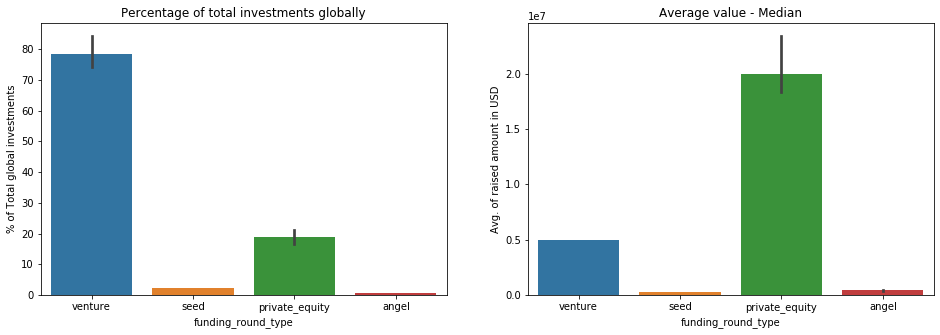

In [890]:
from numpy import median
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title("Percentage of total investments globally")
master_frameplot = master_frame_All[master_frame_All['funding_round_type'].isin(['venture', 'angel', 'seed','private_equity'])]
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frameplot,
            estimator=lambda x : 100*sum(x)/sum(master_frameplot['raised_amount_usd']))
plt.ylabel("% of Total global investments")
plt.subplot(1, 2, 2)
plt.title("Average value - Median")
master_frameplot2 = master_frame_All[master_frame_All['funding_round_type'].isin(['venture', 'angel', 'seed','private_equity'])]
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frameplot2, estimator=median)
plt.ylabel("Avg. of raised amount in USD")
plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [1149]:
master_frame_venture = master_frame_All[master_frame_All['funding_round_type']=='venture']

In [876]:
top9

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

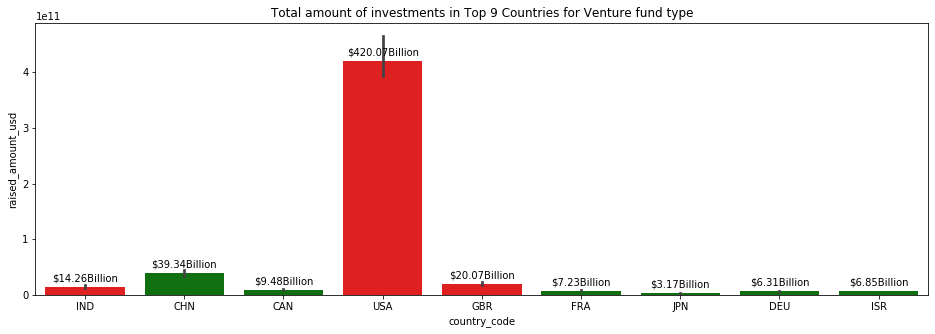

In [1148]:
master_frame_venture_top9 = master_frame_venture[master_frame_venture['country_code'].isin(top9)]
top3Countries = top3countries[:3]
plt.figure(figsize=(16, 5))
plt.title("Total amount of investments in Top 9 Countries for Venture fund type")
clrs = ['red' if (x  in top3Countries) else 'green' for x in master_frame_venture_top9['country_code'].unique()]
ax = sns.barplot(x='country_code', y='raised_amount_usd', data=master_frame_venture_top9,
            estimator=sum, palette=clrs)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10000000000,
            '$'+'{:1.2f}'.format(height/1000000000)+'Billion',
            ha="center") 


A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [1050]:
master_mapping_top3 = master_mapping[master_mapping['country_code'].isin(['USA', 'GBR', 'IND'])]
master_mapping_top3_topsector = master_mapping_top3[master_mapping_top3['main_sector'].isin([''])]

Preparing the dataframe with top 3 countries (USA, GBR, IND) data:-

In [1061]:
top_usa = D1.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments', 'country_code']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

In [1063]:
top_gbr = D2.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments', 'country_code']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

In [1064]:
top_ind = D3.loc[:,['main_sector', 'sectorwise_investment_count', 'sectorwise_total_investments', 'country_code']].sort_values('sectorwise_investment_count', ascending=False).drop_duplicates().head(3)

In [1068]:
top3_All = pd.concat([top_usa, top_gbr, top_ind])
top3_All

,main_sector,sectorwise_investment_count,sectorwise_total_investments,country_code
286660,Others,2950,2.632101e+10,USA
326853,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
88262,Cleantech / Semiconductors,2350,2.163343e+10,USA
286836,Others,147,1.283624e+09,GBR
327888,"Social, Finance, Analytics, Advertising",133,1.089404e+09,GBR
89504,Cleantech / Semiconductors,130,1.163990e+09,GBR
273528,Others,110,1.013410e+09,IND
340181,"Social, Finance, Analytics, Advertising",60,5.505496e+08,IND
235258,"News, Search and Messaging",52,4.338345e+08,IND


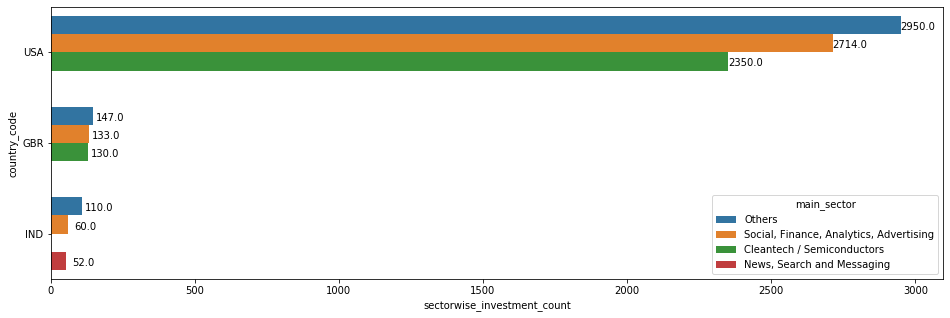

In [1133]:
plt.figure(figsize=(16, 5))
ax = sns.barplot(y='country_code', x='sectorwise_investment_count', hue='main_sector', data=top3_All)
for p in ax.patches:
    if float(p.get_width()) > 0:
        height = p.get_y()+p.get_height()/1.3
        width = p.get_width()
        ax.text(width+60, height,
            ''+ str(width),
            ha="center") 

<b>Extra queries made while preparing the ppt. <b>

In [1137]:
master_frameplot.groupby('funding_round_type')['raised_amount_usd'].apply(lambda x : 100*sum(x)/sum(master_frameplot['raised_amount_usd']))

funding_round_type
angel              0.597774
private_equity    18.816994
seed               2.205818
venture           78.379415
Name: raised_amount_usd, dtype: float64

In [1138]:
master_frame_venture_top9.groupby('country_code').sum()

,raised_amount_usd
country_code,
CAN,9.482218e+09
CHN,3.933892e+10
DEU,6.306922e+09
FRA,7.226851e+09
GBR,2.007281e+10
IND,1.426151e+10
ISR,6.854350e+09
JPN,3.167647e+09
USA,4.200680e+11
